In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd

data = pd.read_csv(r'c:\Users\kietb\Downloads\NGC5139_2ndver.csv')

In [5]:
# convert G filter to absolute mag
data['abs_mag'] = data['phot_g_mean_mag'] + 5 + 5*np.log10(data['parallax']/1000)

C:\Users\kietb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


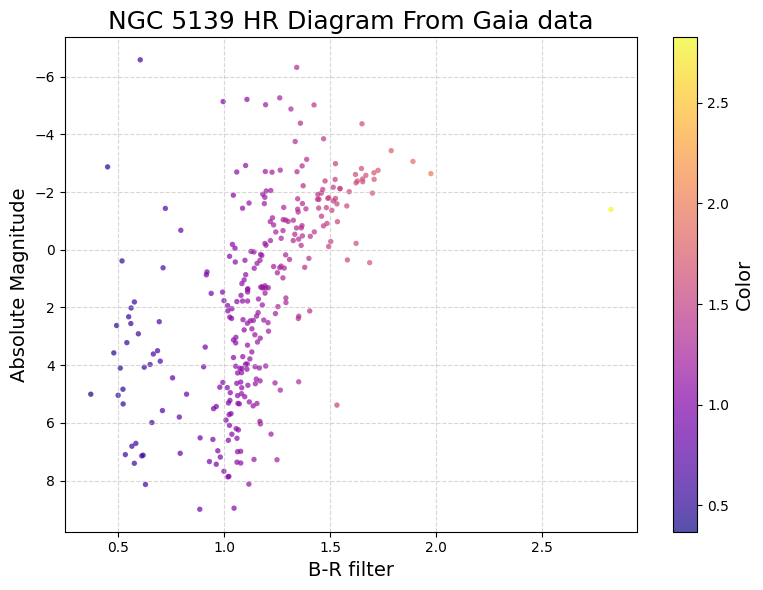

In [6]:
# HR Diagram Using only Gaia's data
colors_range = data['bp_rp'] # adjusting the range of color based on the data

plt.figure(figsize=(8, 6))

scat = plt.scatter(data['bp_rp'], data['abs_mag'], c=colors_range, cmap='plasma', s=15, edgecolor='none', alpha=0.7)

plt.gca().invert_yaxis() # flip the Y-axis to get valid data

# color bar
bar = plt.colorbar(scat)
bar.set_label('Color', fontsize = 14)

# labels
plt.title('NGC 5139 HR Diagram From Gaia data', fontsize = 18)
plt.xlabel('B-R filter', fontsize = 14)
plt.ylabel('Absolute Magnitude', fontsize = 14)

# presentation stuffs
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
MIST_data = np.loadtxt(r'c:\Users\kietb\Downloads\MIST_data\MIST_dat.dat')
# picking data values from MIST data
ages = MIST_data[:,1]
G_mag = MIST_data[:,23]
B_mag = MIST_data[:,24]
R_mag = MIST_data[:,25]

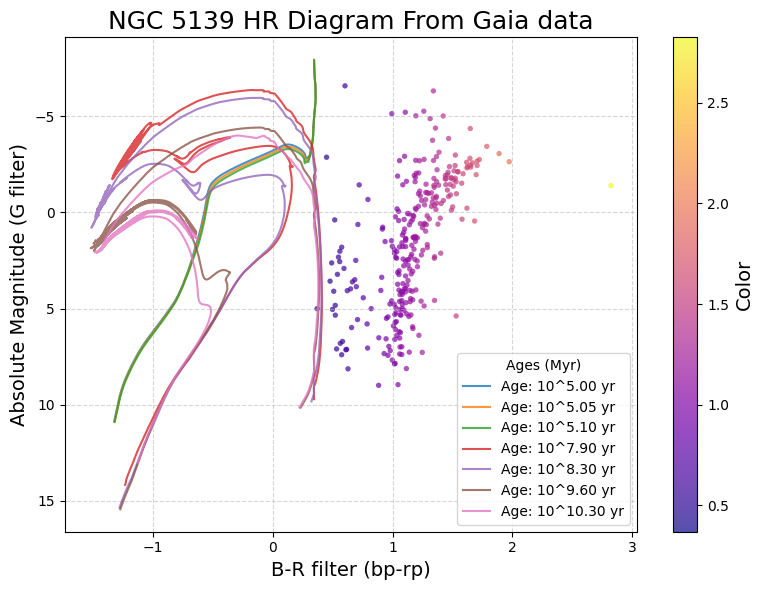

In [8]:
# picking plotting ages 
plot_age = np.array([5, 5.04999, 5.09999, 7.9, 8.3, 9.6, 10.3])

plt.figure(figsize=(8, 6))

# filter out MIST data for plotting ages 
for age in plot_age:
    age_fil = np.where(np.abs(ages - age) <= 1e-3)[0]
    if len(age_fil) > 0:  # Ensure there are matching indices
        plt.plot(B_mag[age_fil] - R_mag[age_fil], G_mag[age_fil], label=f'Age: 10^{age:.2f} yr', alpha=0.8)

# plot the Gaia HR diagram 
colors_range = data['bp_rp']  
scat = plt.scatter(data['bp_rp'], data['abs_mag'], c=colors_range, cmap='plasma', s=15, edgecolor='none', alpha=0.7)

# color bar
bar = plt.colorbar(scat)
bar.set_label('Color', fontsize=14)

# labels and title
plt.title('NGC 5139 HR Diagram From Gaia data', fontsize=18)
plt.xlabel('B-R filter (bp-rp)', fontsize=14)
plt.ylabel('Absolute Magnitude (G filter)', fontsize=14)

# flip the Y-axis
plt.gca().invert_yaxis()

# presentation stuffs 
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Ages (Myr)')
plt.tight_layout()
plt.show()
